In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。  
$$
h_{\theta}(x) = \theta_{0}x_{0} + \theta_{1}x_{1} + ... + \theta_{n}x_{n}
$$

## 【問題2】最急降下
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。  
$$
\theta_{j} := \theta_{j} - \alpha \frac{1}{m} \sum^{m}_{i=1} [h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_{j}]
$$

## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。  
仮定関数 $ h_{\theta}(x) $ の出力が推定結果です。

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。  
平均二乗誤差関数は回帰問題全般で使える関数のたScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。  
平均二乗誤差は以下の数式で表されます。  
$$
L(\theta) = \frac{1}{m} \sum^{m}_{i=1}(h_{\theta}(x^{(i)}) - y^{(i)})^{2}
$$ 

## 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。  
そして、これをself.loss, self.val_lossに記録するようにしてください。  
目的関数（損失関数）$ J(\theta) $ は次の式です。
$$
J(\theta) = \frac{1}{2m} \sum^{m}_{i=1}(h_{\theta}(x^{(i)}) - y^{(i)})^2
$$

In [2]:
class ScratchLinearRegression():
    
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.m = None
        self.X = None
        self.y = None
        self.h = None
        self.theta = None
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        

    def fit(self, X, y, X_val=None, y_val=None):
        
        self.m = X.shape[1]
        self.X = X
        self.y = y.reshape(-1, 1)
        if self.bias:
            self.X = np.insert(arr=X, obj=0, values=1, axis=1)
            if X_val is not None:
                X_val = np.insert(arr=X_val, obj=0, values=1, axis=1)
        self.theta = np.random.randn(self.X.shape[1], 1)
        
        for i in range(self.iter):
            self.h = self._linear_hypothesis(self.X)
            self.theta -= self._gradient_descent()

            self.loss[i] = 1 / (2*self.m) * np.sum((self.h - y)**2)
            if X_val is not None:
                self.val_loss[i] = 1 / (2*self.m) * np.sum((np.dot(X_val, self.theta) - y_val)**2)
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.loss)

    def _linear_hypothesis(self, X):
        return np.dot(X, self.theta)
    
    def _gradient_descent(self):
        return self.lr / self.m * np.dot(self.X.T, self.h-self.y)
                    
    def predict(self, X_test):
        if self.bias:
            X_test = np.insert(arr=X_test, obj=0, values=1, axis=1)
        return np.dot(X_test, self.theta)
    

In [3]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    n_samples = len(y)
    mse = np.sum((y_pred - y)**2) / n_samples
    return mse

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。  
scikit-learnによる実装と比べ、正しく動いているかを確認してください。  

In [4]:
train = pd.read_csv('../week4/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
scaler = StandardScaler()
train['SalePrice'] = scaler.fit_transform(train[['SalePrice']])

In [6]:
numerical_feats = train.columns[train.dtypes != 'object']
train.fillna(train[numerical_feats].mean(), inplace=True)

In [16]:
X = train[['GrLivArea', 'LotArea', 'GarageArea', 'TotalBsmtSF']].values
y = train['SalePrice'].values
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)

array([-0.61124647, -0.51192183,  0.41104826, -0.03631161,  0.95745396,
        0.85836191,  0.65433833,  0.5698389 , -0.27266184, -0.19920279,
       -0.49654494,  2.33358648,  0.19165957,  0.10800036,  1.12297917,
        0.0864042 ,  0.06830822, -0.46403718, -0.07488335, -0.612741  ,
       -0.8501603 ,  0.22467208, -0.39498043, -0.59315905, -0.11564838,
        1.53041577, -0.59143435,  0.6040932 ,  1.11665157,  1.32578792,
        0.05414697, -0.65603323, -0.53321339, -0.55168719, -1.1946931 ,
        0.24920972, -0.1065654 , -0.2470445 ,  2.2170765 ,  0.11018882,
       -0.86920721,  0.62047105,  0.29094708,  0.60561691, -0.00690047,
        0.59279527,  0.53548183, -0.43147292,  1.17049024, -0.47282665,
       -0.4197541 ,  0.80066753,  0.24937267, -0.55094712, -0.16200616,
       -1.26711531,  0.10361145,  1.3929782 ,  0.38442489,  0.123603  ,
       -0.28579004, -1.08405971,  0.70576459,  0.39395751, -1.31241021,
       -0.32737717,  1.53697196,  0.04596226,  0.88089306, -0.55

In [18]:
sc_lr = ScratchLinearRegression(num_iter=500, lr=0.000000000001, bias=True, verbose=False)
sc_lr.fit(X_train, y_train, X_test, y_test)
y_pred = sc_lr.predict(X_test)

## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。  
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

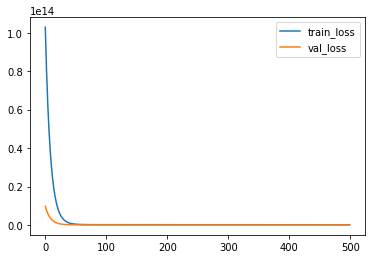

In [22]:
plt.plot(sc_lr.loss, label='train_loss')
plt.plot(sc_lr.val_loss, label='val_loss')
plt.legend()

## 【問題8】バイアス項の除去
バイアス項 $\theta_0 $ を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [23]:
sc_lr = ScratchLinearRegression(num_iter=500, lr=0.000000000001, bias=False, verbose=None)
sc_lr.fit(X_train, y_train, X_test, y_test)
y_pred = sc_lr.predict(X_test)

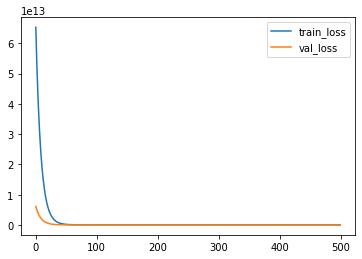

In [24]:
plt.plot(sc_lr.loss, label='train_loss')
plt.plot(sc_lr.val_loss, label='val_loss')
plt.legend()

バイアス項は切片を反映。